In [1]:
#go to Dumpy directory using bash
import os
os.chdir('/Users/samde/OneDrive - University of California, San Diego Health/Dumpy')  # Replace with the actual path to Dumpy directory

In [3]:
#do pip install PyQt6
import sys
import subprocess
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'PyQt6'])

#install pandas, numpy, seaborn, matplotlib
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas', 'numpy', 'seaborn', 'matplotlib'])

  Using cached pyqt6-6.10.1-cp39-abi3-macosx_10_14_universal2.whl.metadata (2.1 kB)
Using cached pyqt6-6.10.1-cp39-abi3-macosx_10_14_universal2.whl (60.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 39.7 MB/s eta 0:00:00a 0:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


0

In [2]:
#read in GMTOLsong_table2024_N20_f2all_gg2_f_Phylum_rel.tsv which has relative abundances for all samples in GMTOL at phyla level. Samples are columns, taxa are rows.
#read in Nov20_25_GMTOL_metadata_all.txt which has metadata for all samples in GMTOL including Class.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read in the relative abundance table
rel_abund = pd.read_csv('GMTOLsong_table2024_N20_f2all_gg2_f_Phylum_rel.tsv', sep='\t', index_col=0)
# Read in the metadata file
metadata = pd.read_csv('Nov20_25_GMTOL_metadata_all.txt', sep='\t')

# Transpose the relative abundance table so that samples are rows and taxa are columns
rel_abund_t = rel_abund.T
# Merge the relative abundance data with the metadata
merged = rel_abund_t.merge(metadata, left_index=True, right_on='sampleid')
#First I want to group by Chordata and plot relative abundances of phyla to compare Vertebrate to Invertebrate. I want to do this for d__Bacteria;p__Bacillota_A_368345, d__Bacteria;p__Pseudomonadota, d__Bacteria;p__Bacteroidota, and d__Bacteria;p__Bacillota_I. And I want to show error bars as well

# Define the phyla of interest
phyla_of_interest = ['d__Bacteria;p__Bacillota_A_368345', 'd__Bacteria;p__Pseudomonadota', 'd__Bacteria;p__Bacteroidota', 'd__Bacteria;p__Bacillota_I']
# Filter the merged data for the phyla of interest
filtered = merged[['Chordata'] + phyla_of_interest]
# Melt the dataframe for easier plotting
melted = filtered.melt(id_vars='Chordata', value_vars=phyla_of_interest, var_name='Phylum', value_name='Relative_Abundance')

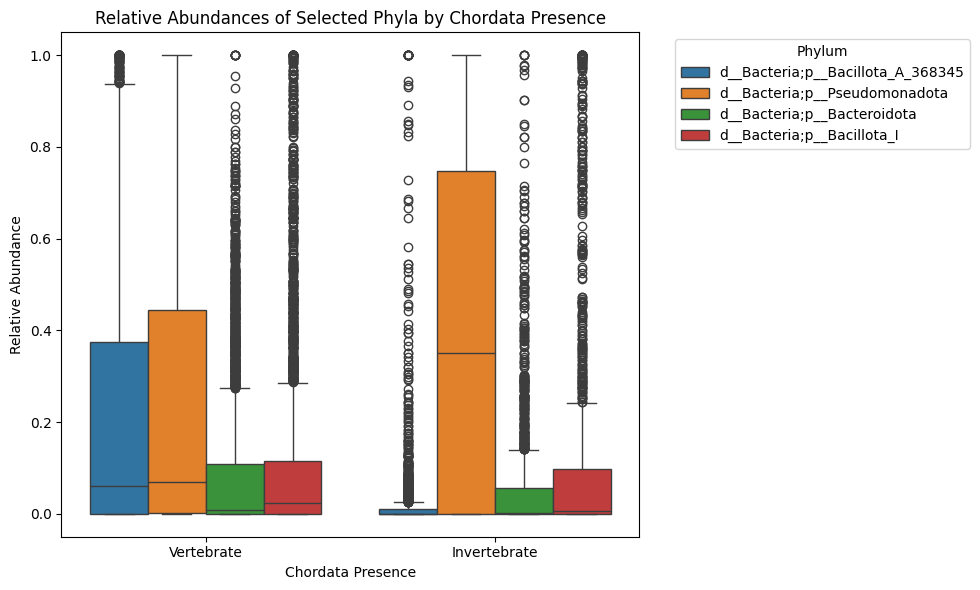

In [22]:
value_name=('Relative_Abundance')
# Plot the relative abundances as box plots with jitter points and make Chordata the x axis and make the phyla different colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Chordata', y='Relative_Abundance', hue='Phylum')
#sns.stripplot(data=melted, x='Chordata', y='Relative_Abundance', hue='Phylum', dodge=True, color='black', alpha=0.5)
plt.title('Relative Abundances of Selected Phyla by Chordata Presence')
plt.ylabel('Relative Abundance')
plt.xlabel('Chordata Presence')
plt.legend(title='Phylum')
#put legend to right of graph
plt.legend(title='Phylum', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig('Relative_Abundances_by_Chordata.png')
plt.show()


/var/folders/l5/bc59br8961516ssfthb0x16h0000gn/T/ipykernel_30680/4105930320.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=melted_no_actino, x='Chordata', y='Relative_Abundance', hue='Phylum', dodge=True, color='black', alpha=0.5)


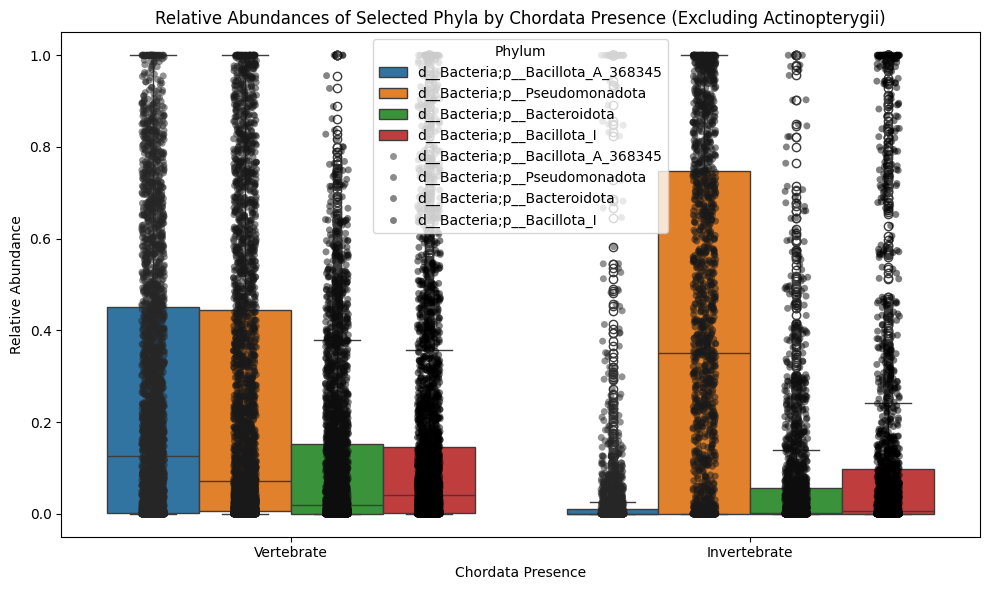

In [9]:
#ok now try same thing as above but take out Class='Actinopterygii' from data and then remelt everything
# Filter the merged data for Class 'Actinopterygii'
filtered_no_actino = merged[merged['Class'] != 'Actinopterygii'][['Chordata'] + phyla_of_interest]
# Melt the dataframe for easier plotting
melted_no_actino = filtered_no_actino.melt(id_vars='Chordata', value_vars=phyla_of_interest, var_name='Phylum', value_name='Relative_Abundance')
# Plot the relative abundances as box plots with jitter points and make Chordata the x axis and make the phyla different colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_no_actino, x='Chordata', y='Relative_Abundance', hue='Phylum')
sns.stripplot(data=melted_no_actino, x='Chordata', y='Relative_Abundance', hue='Phylum', dodge=True, color='black', alpha=0.5)
plt.title('Relative Abundances of Selected Phyla by Chordata Presence (Excluding Actinopterygii)')
plt.ylabel('Relative Abundance')
plt.xlabel('Chordata Presence')
plt.legend(title='Phylum')
plt.tight_layout()
#plt.savefig('Relative_Abundances_by_Chordata_no_Actinopterygii.png')
plt.show()



In [10]:
#print out how many rows per Class I have in data
class_counts = merged['Class'].value_counts()
print(class_counts)

Class
Mammalia           1394
Insecta            1022
Actinopterygii      811
Aves                768
Reptilia            561
Amphibia            251
Gastropoda          144
Malacostraca        144
Bivalvia             92
Echinoidea           41
Clitellata           40
Petromyzontida       39
Saline               36
leaf_surface         30
Anthozoa             29
Hyperoartia          26
Ophiuroidea          23
Non-saline           21
Arachnida            20
algae                20
Chondrichthyes       20
Cephalopoda          20
Holothuroidea        20
water                20
Sarcopterygii        13
Cephalochordata       6
Merostomata           6
Name: count, dtype: int64


/var/folders/l5/bc59br8961516ssfthb0x16h0000gn/T/ipykernel_30680/3485325909.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=melted_no_aves, x='Chordata', y='Relative_Abundance', hue='Phylum', dodge=True, color='black', alpha=0.5)


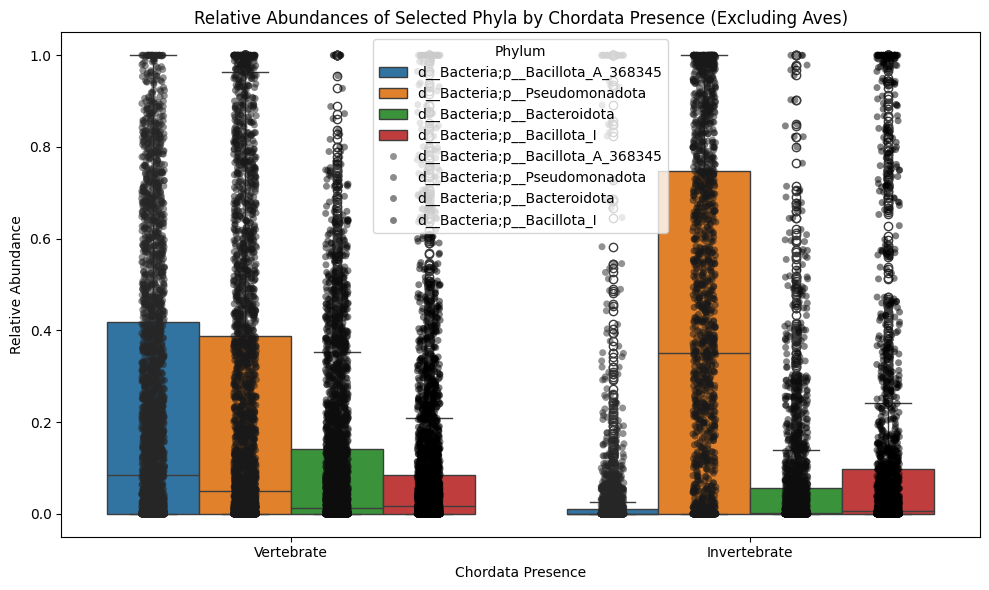

In [11]:
#now try without Class='Aves'
# Filter the merged data for Class 'Aves'
filtered_no_aves = merged[merged['Class'] != 'Aves'][['Chordata'] + phyla_of_interest]
# Melt the dataframe for easier plotting
melted_no_aves = filtered_no_aves.melt(id_vars='Chordata', value_vars=phyla_of_interest, var_name='Phylum', value_name='Relative_Abundance')
# Plot the relative abundances as box plots with jitter points and make Chordata the x axis and make the phyla different colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_no_aves, x='Chordata', y='Relative_Abundance', hue='Phylum')
sns.stripplot(data=melted_no_aves, x='Chordata', y='Relative_Abundance', hue='Phylum', dodge=True, color='black', alpha=0.5)
plt.title('Relative Abundances of Selected Phyla by Chordata Presence (Excluding Aves)')
plt.ylabel('Relative Abundance')
plt.xlabel('Chordata Presence')
plt.legend(title='Phylum')
plt.tight_layout()
#plt.savefig('Relative_Abundances_by_Chordata_no_Aves.png')
plt.show()

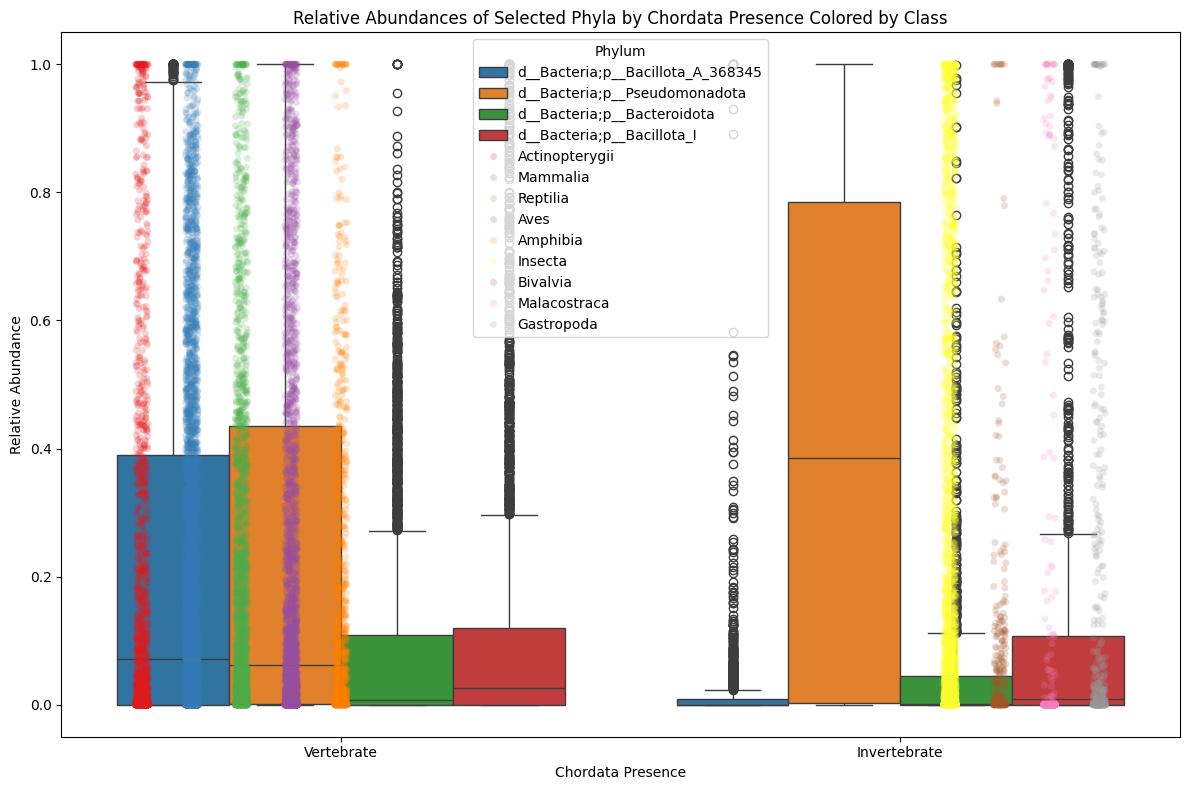

In [20]:
#now try the original data but color each point by Class. Make sure the melted data has Class. Also make sure to subset only Mammalia, Insecta, Actinopterygii, Aves, Reptilia, Amphibia, Gastropoda, Malacostraca, and Bivalvia
classes_of_interest = ['Mammalia', 'Insecta', 'Actinopterygii', 'Aves', 'Reptilia', 'Amphibia', 'Gastropoda', 'Malacostraca', 'Bivalvia']
filtered_classes = merged[merged['Class'].isin(classes_of_interest)][['Chordata', 'Class'] + phyla_of_interest]
# Melt the dataframe for easier plotting
melted_classes = filtered_classes.melt(id_vars=['Chordata', 'Class'], value_vars=phyla_of_interest, var_name='Phylum', value_name='Relative_Abundance')
# Plot the relative abundances as box plots with jitter points and make Chordata the x axis and make the phyla different colors
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_classes, x='Chordata', y='Relative_Abundance', hue='Phylum')
sns.stripplot(data=melted_classes, x='Chordata', y='Relative_Abundance', hue='Class', palette='Set1', dodge=True,alpha=0.2)
plt.title('Relative Abundances of Selected Phyla by Chordata Presence Colored by Class')
plt.ylabel('Relative Abundance')
plt.xlabel('Chordata Presence')
plt.legend(title='Phylum')
plt.tight_layout()
#plt.savefig('Relative_Abundances_by_Chordata_colored_by_Class.png')
plt.show()


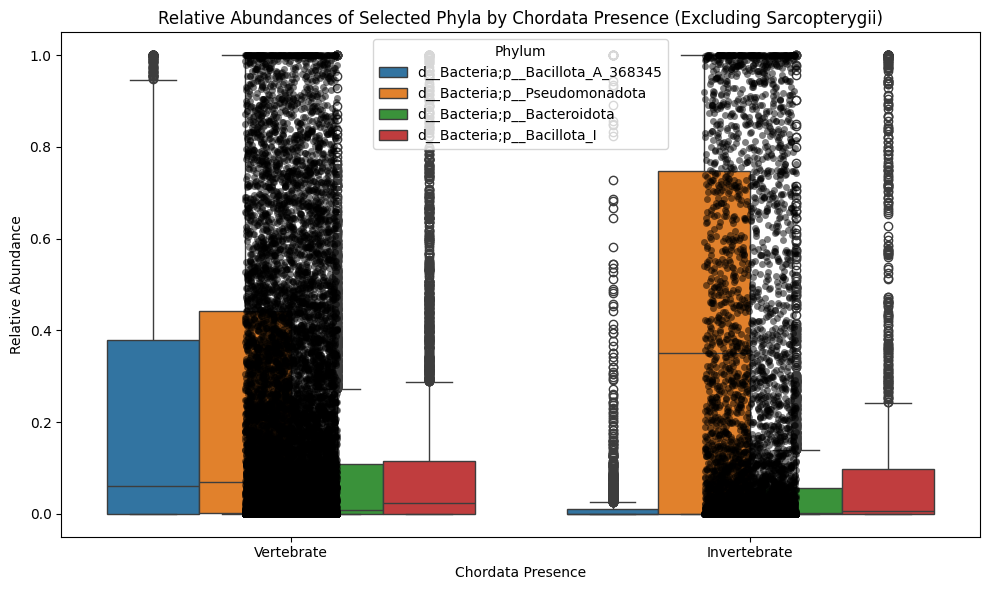

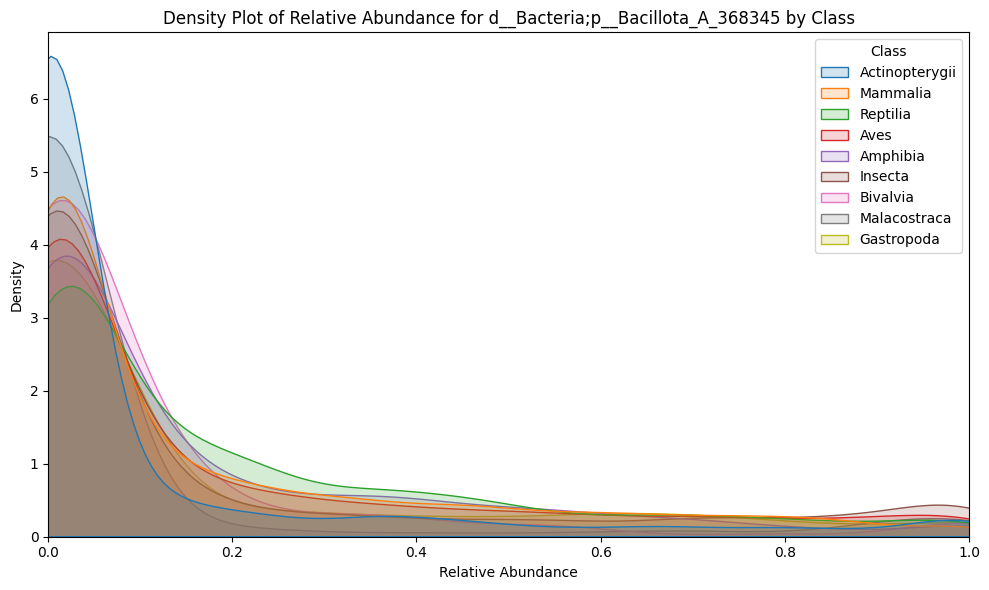

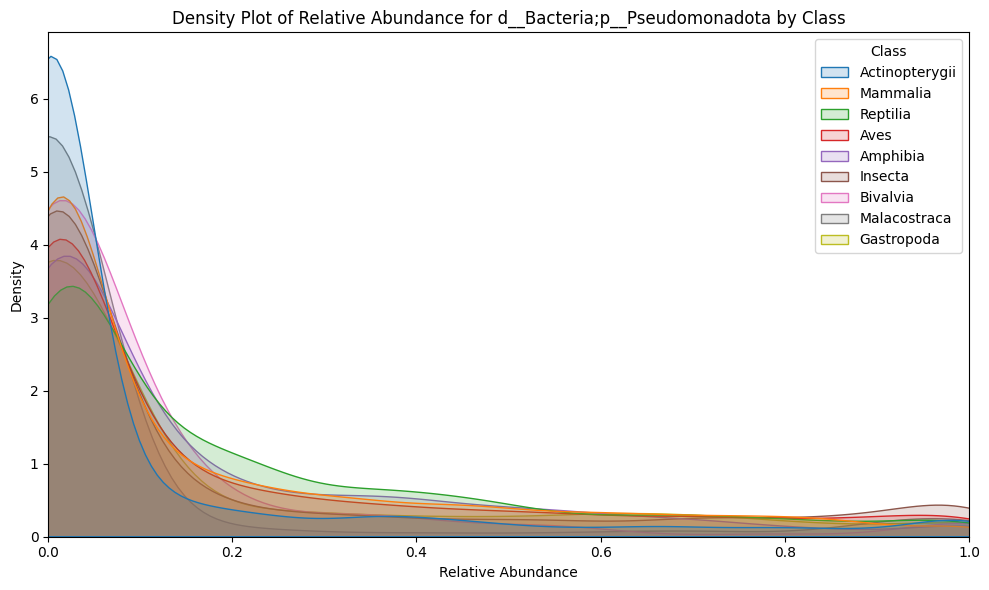

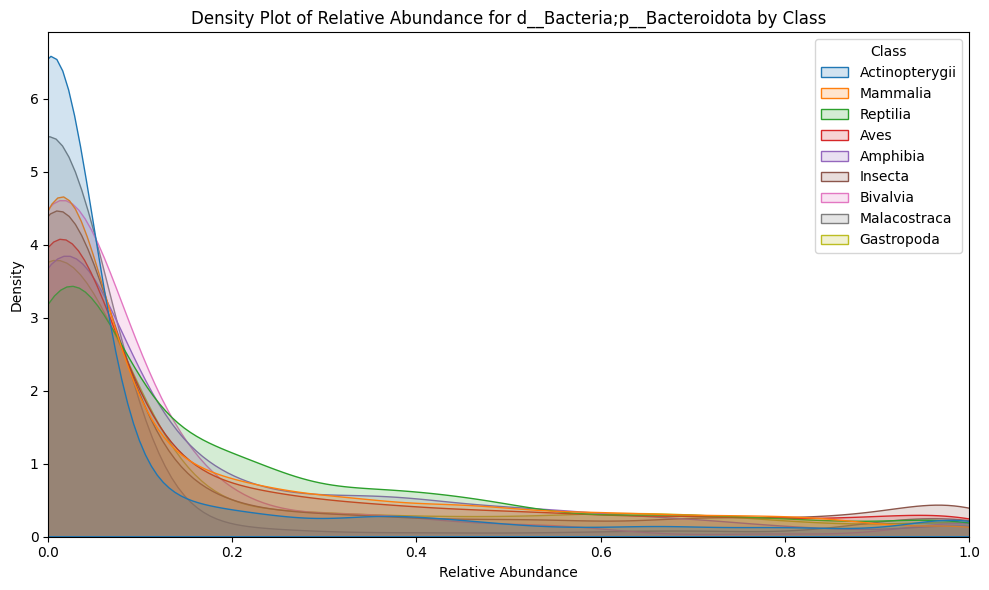

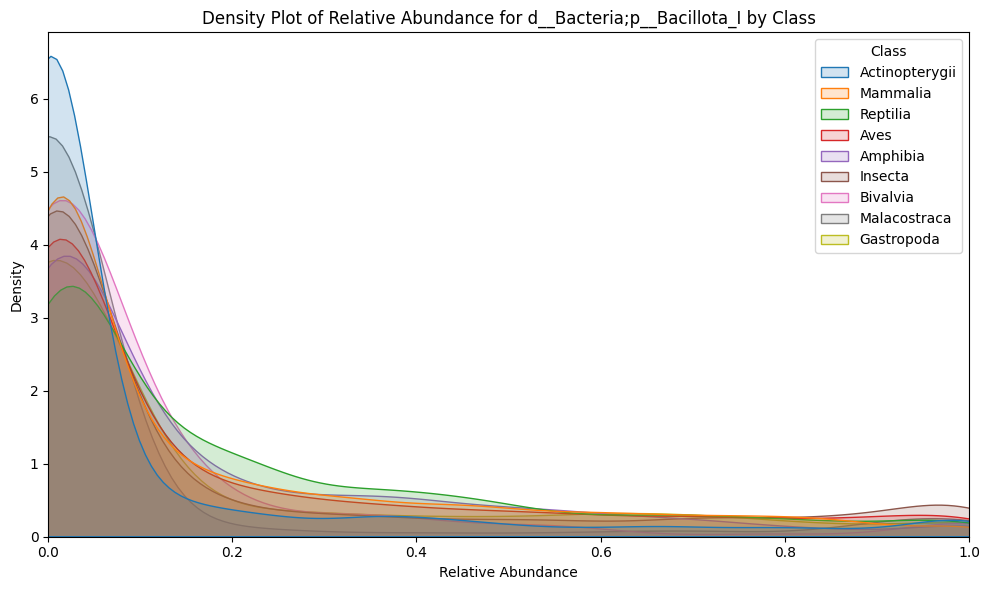

In [24]:
#ok now instead, for each phylum, plot the relative abundances for each Class as density plots overlapping one another. Make relative abundance the X axis and density the Y axis. Do this for each of the four phyla of interest

for phylum in phyla_of_interest:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=melted_classes, x='Relative_Abundance', hue='Class', common_norm=False, fill=True, alpha=0.2)
    plt.title(f'Density Plot of Relative Abundance for {phylum} by Class')
    plt.xlabel('Relative Abundance')
    plt.ylabel('Density')
    plt.xlim(0, 1)  # Assuming relative abundance ranges from 0 to 1
    plt.tight_layout()
    #plt.savefig(f'Density_Plot_{phylum}_by_Class.png')
    plt.show()

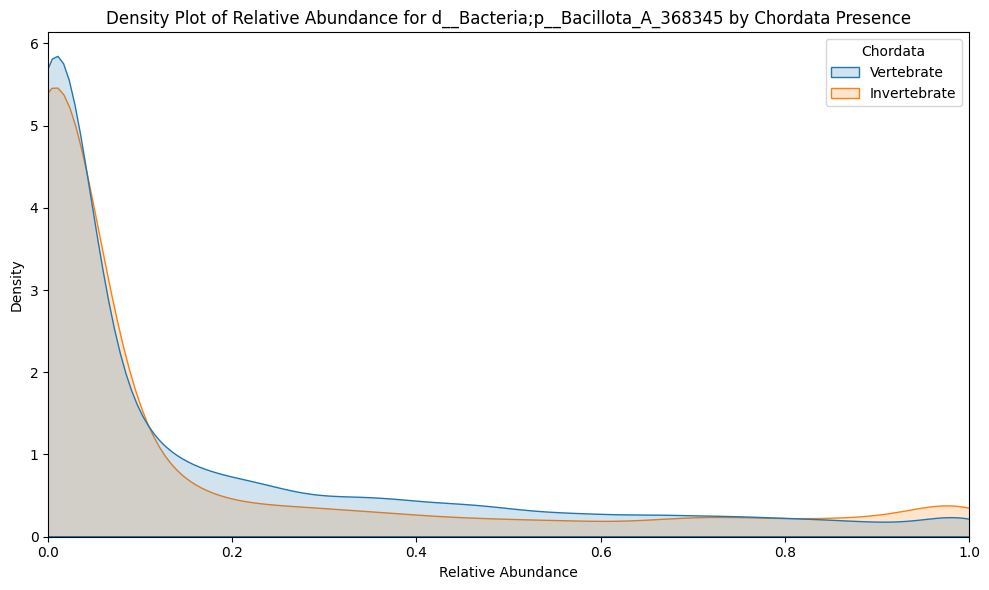

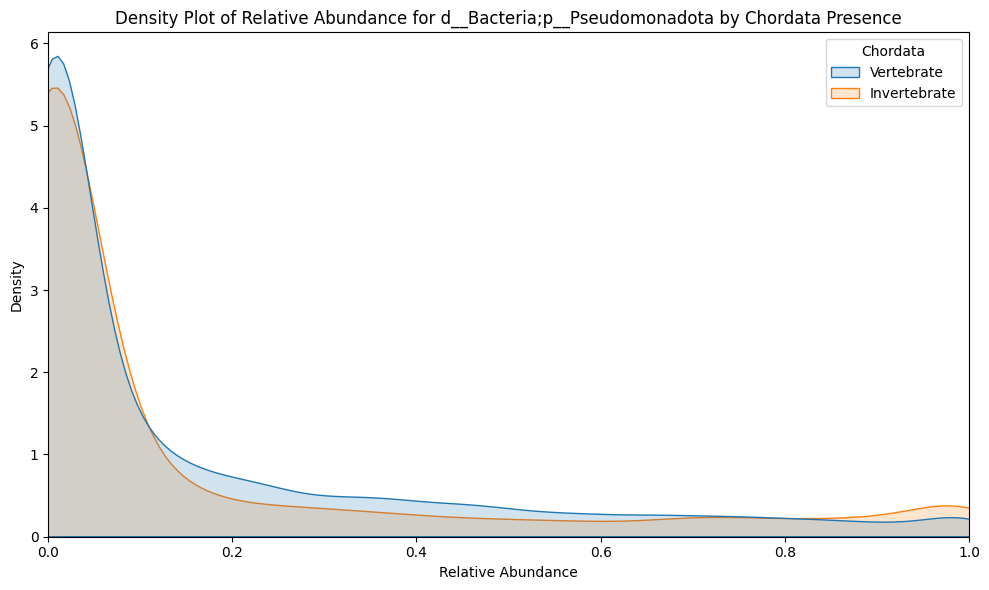

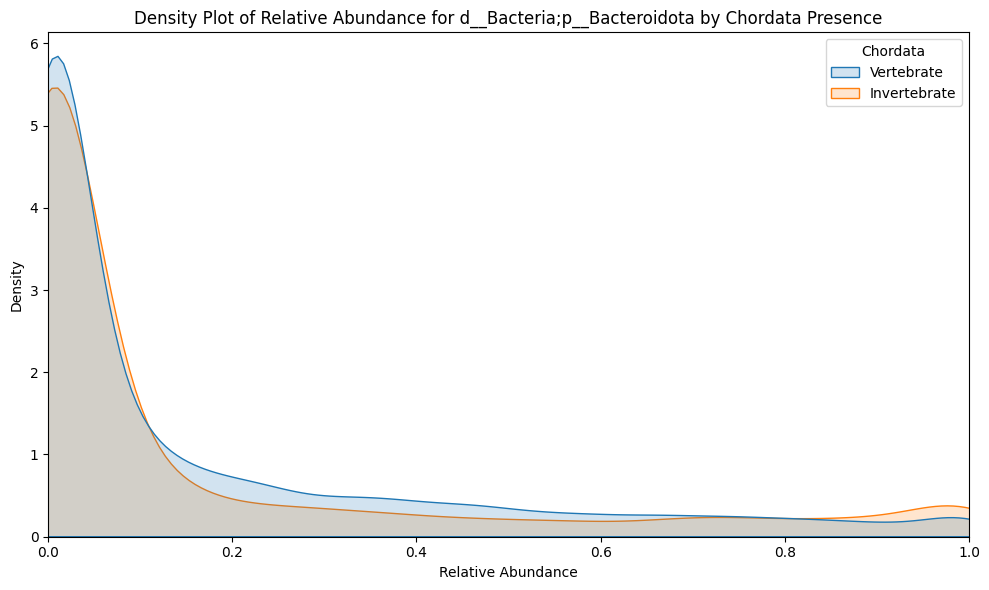

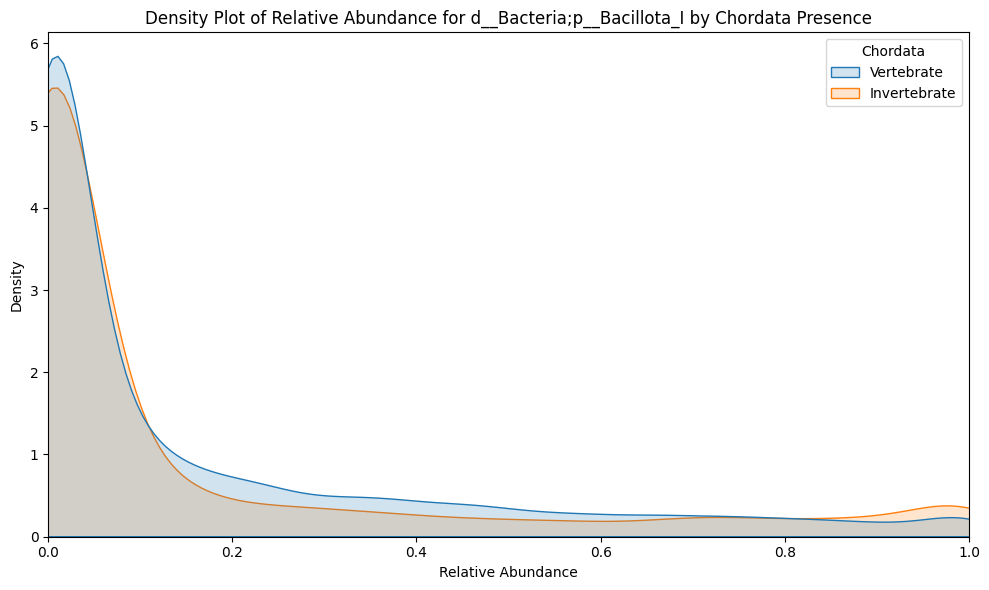

In [25]:
#ok now try density plots but make each color Chordata instead of Class
for phylum in phyla_of_interest:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=melted, x='Relative_Abundance', hue='Chordata', common_norm=False, fill=True, alpha=0.2)
    plt.title(f'Density Plot of Relative Abundance for {phylum} by Chordata Presence')
    plt.xlabel('Relative Abundance')
    plt.ylabel('Density')
    plt.xlim(0, 1)  # Assuming relative abundance ranges from 0 to 1
    plt.tight_layout()
    #plt.savefig(f'Density_Plot_{phylum}_by_Chordata.png')
    plt.show()

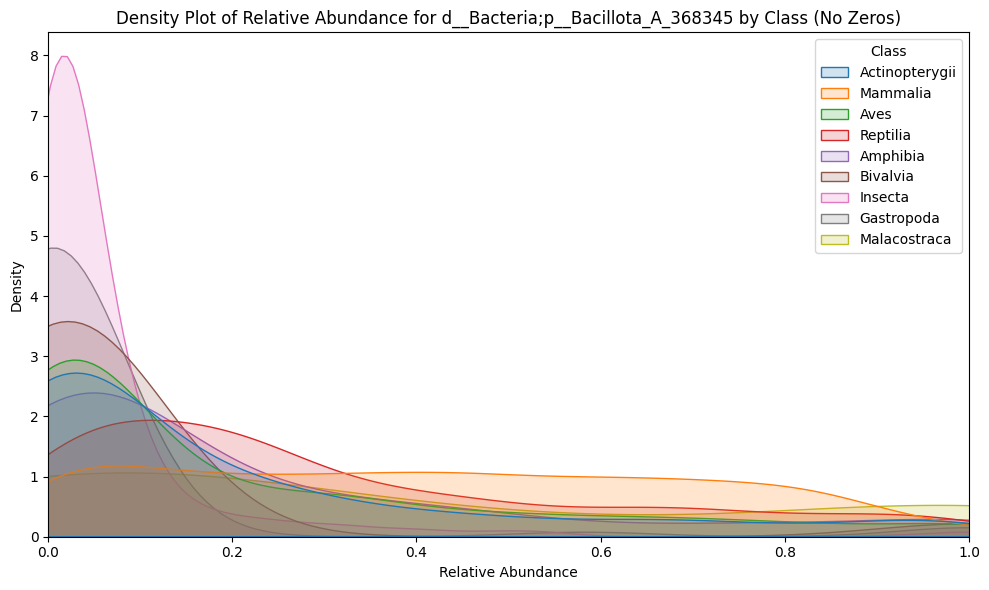

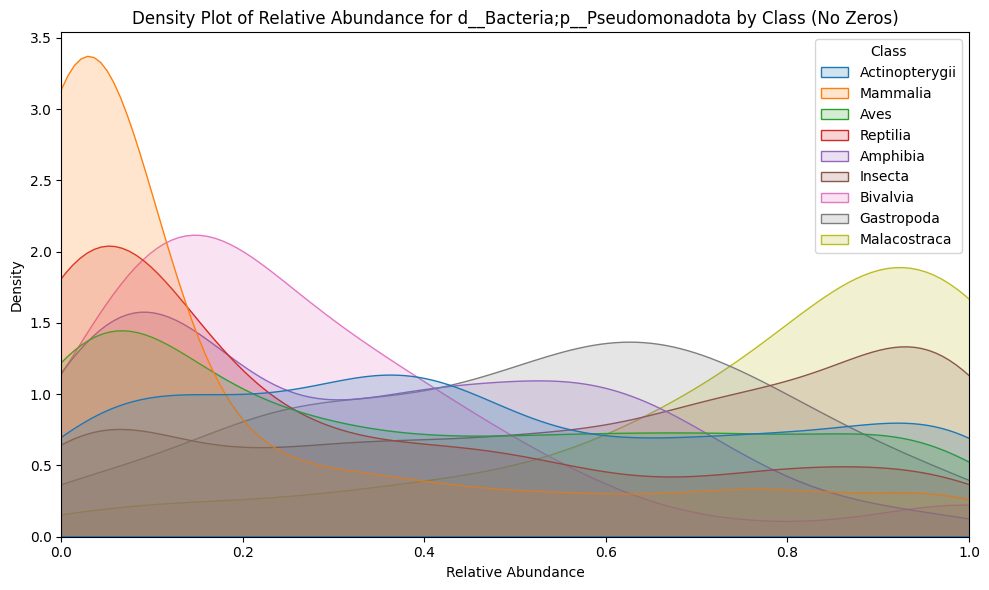

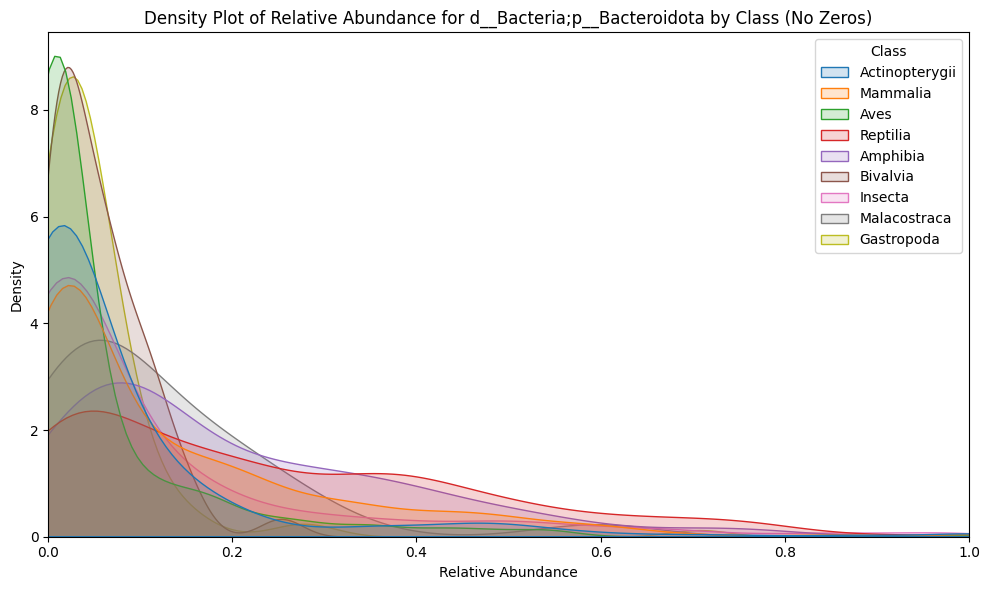

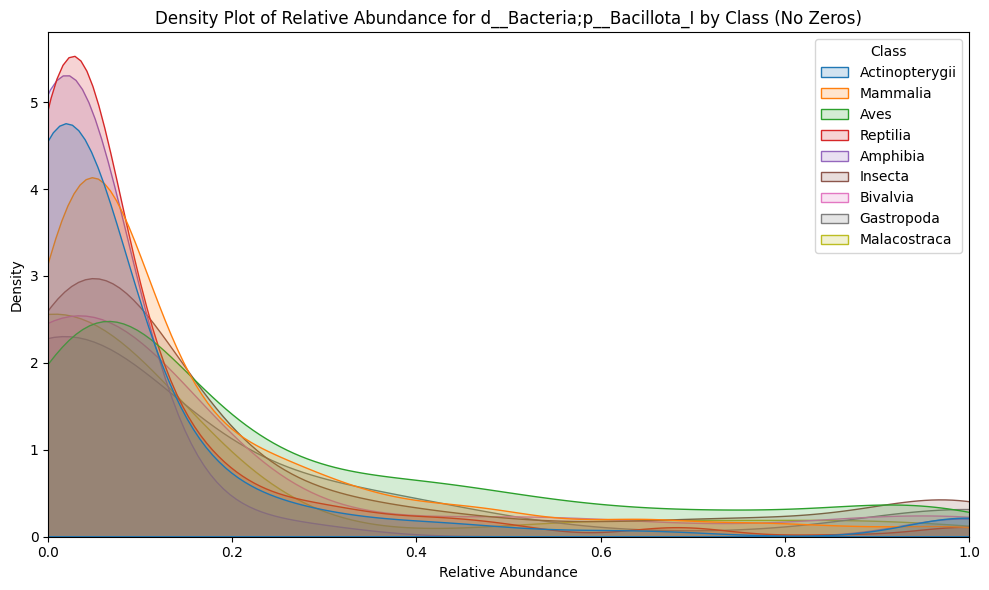

In [26]:
#ok now for each Phyla remove 0s and then do density plots again colored by Class
for phylum in phyla_of_interest:
    melted_no_zeros = melted_classes[melted_classes['Phylum'] == phylum]
    melted_no_zeros = melted_no_zeros[melted_no_zeros['Relative_Abundance'] > 0]
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=melted_no_zeros, x='Relative_Abundance', hue='Class', common_norm=False, fill=True, alpha=0.2)
    plt.title(f'Density Plot of Relative Abundance for {phylum} by Class (No Zeros)')
    plt.xlabel('Relative Abundance')
    plt.ylabel('Density')
    plt.xlim(0, 1)  # Assuming relative abundance ranges from 0 to 1
    plt.tight_layout()
    #plt.savefig(f'Density_Plot_{phylum}_by_Class_no_zeros.png')
    plt.show()

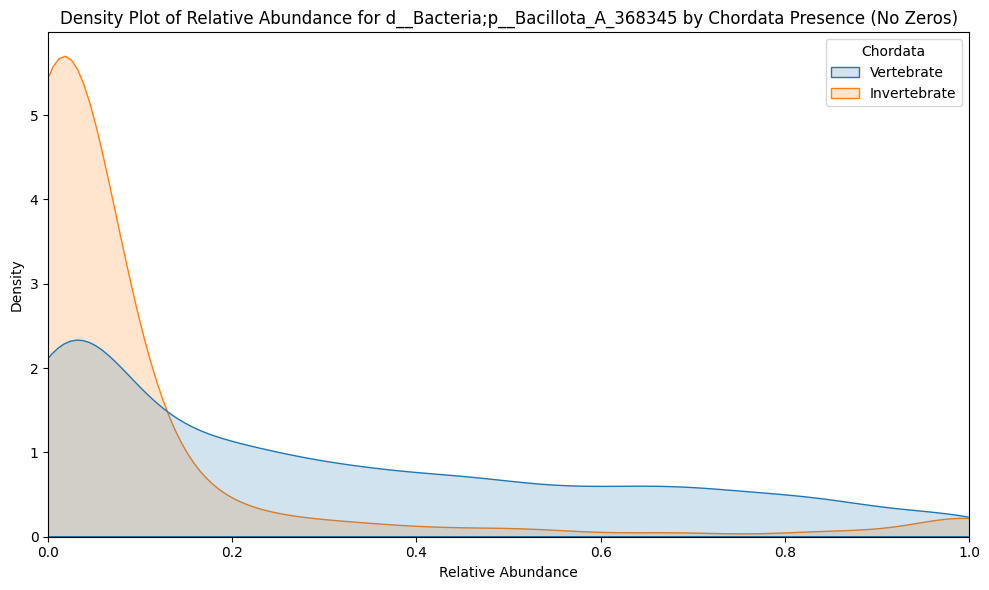

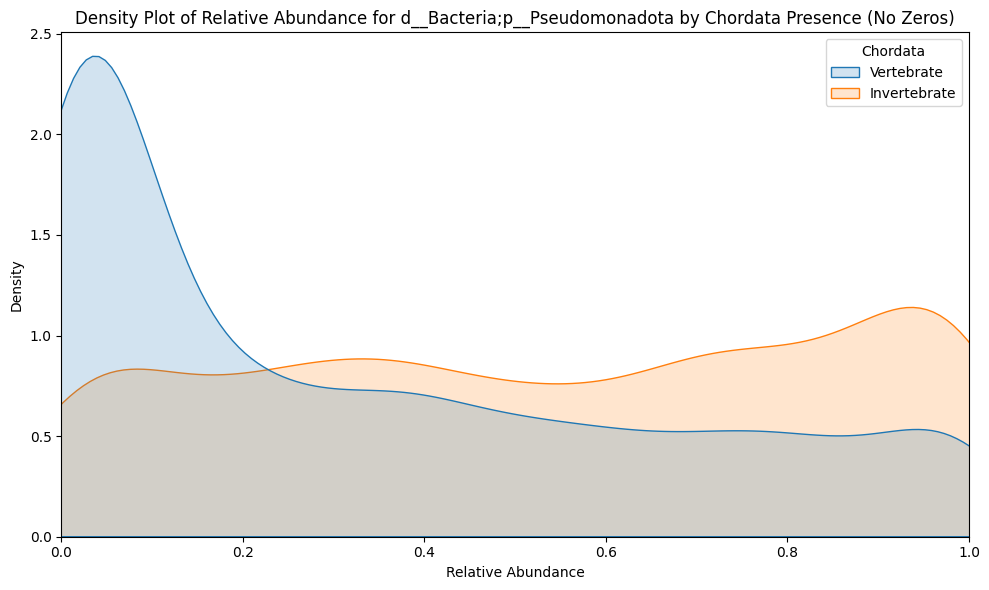

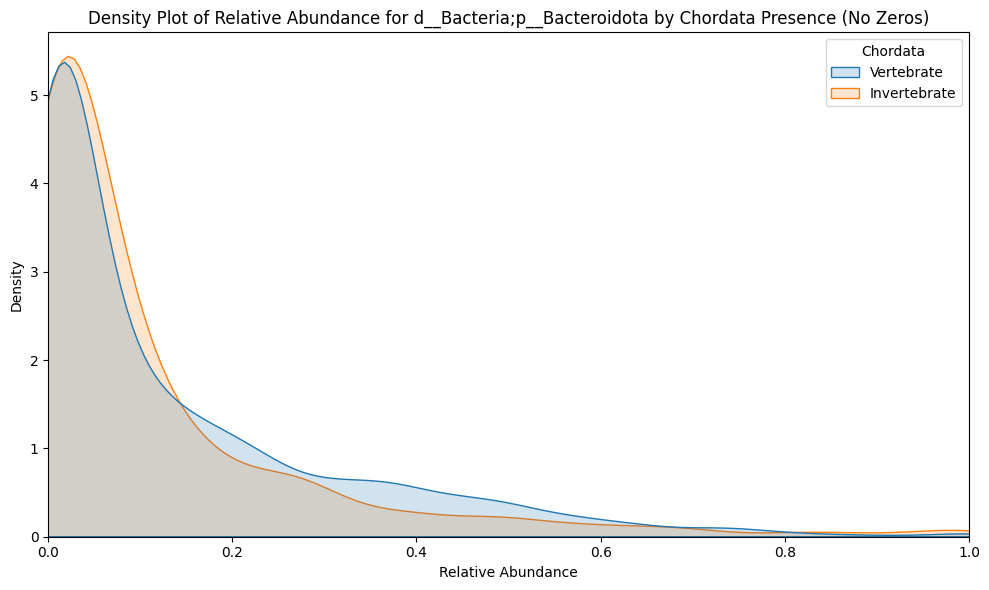

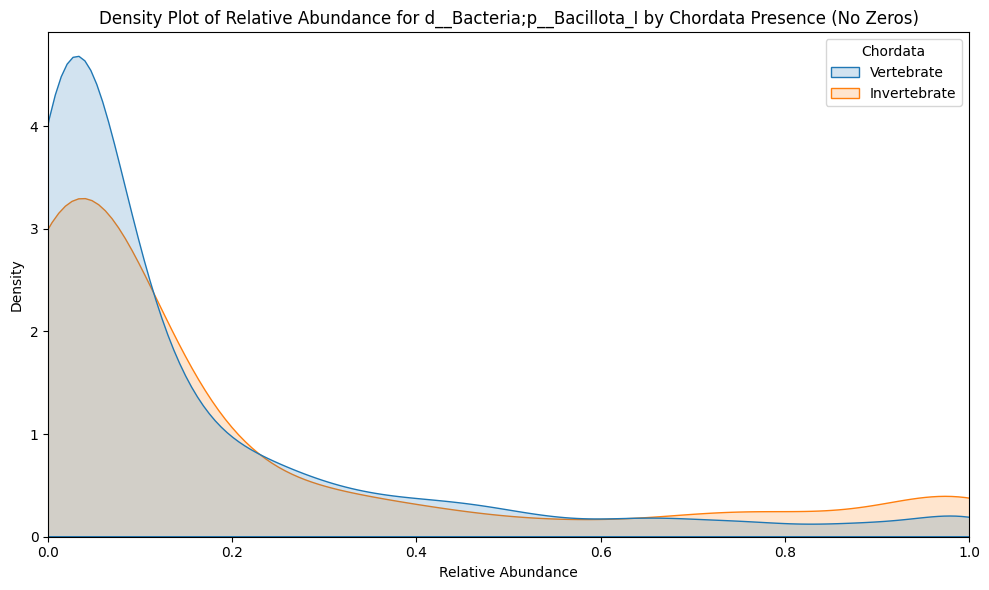

In [27]:
#now do it for Chordata instead of Class
for phylum in phyla_of_interest:
    melted_no_zeros = melted[melted['Phylum'] == phylum]
    melted_no_zeros = melted_no_zeros[melted_no_zeros['Relative_Abundance'] > 0]
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=melted_no_zeros, x='Relative_Abundance', hue='Chordata', common_norm=False, fill=True, alpha=0.2)
    plt.title(f'Density Plot of Relative Abundance for {phylum} by Chordata Presence (No Zeros)')
    plt.xlabel('Relative Abundance')
    plt.ylabel('Density')
    plt.xlim(0, 1)  # Assuming relative abundance ranges from 0 to 1
    plt.tight_layout()
    #plt.savefig(f'Density_Plot_{phylum}_by_Chordata_no_zeros.png')
    plt.show()

In [30]:
#now clr transform the data
from scipy.stats import gmean
import numpy as np
def clr_transform(df):
    # Replace zeros with a small value to avoid issues with log
    df_replaced = df.replace(0, 1e-9)
    # Calculate geometric mean for each sample
    geom_mean = gmean(df_replaced, axis=1)
    # Apply clr transformation
    clr_df = np.log(df_replaced.div(geom_mean, axis=0))
    return clr_df
# Apply clr transformation to the relative abundance data
rel_abund_clr = clr_transform(rel_abund_t)
# Merge the clr transformed data with the metadata
merged_clr = rel_abund_clr.merge(metadata, left_index=True, right_on='sampleid')
rel_abund_clr 


,d__Bacteria;p__Acidobacteriota,d__Bacteria;p__Elusimicrobiota,d__Bacteria;p__Actinomycetota,d__Bacteria;p__Bacillota_A_368345,d__Bacteria;p__Pseudomonadota,d__Bacteria;p__Patescibacteria,d__Bacteria;p__Bacillota_I,d__Bacteria;p__Bacteroidota,d__Bacteria;p__Verrucomicrobiota,d__Bacteria;p__Cyanobacteriota,...,d__Bacteria;p__CSP1-3,d__Bacteria;p__Fermentibacterota,d__Bacteria;p__Nitrospirota_A_437855,d__Bacteria;p__SZUA-79,d__Bacteria;p__2-12-FULL-45-22,d__Bacteria;p__UBA8481,d__Bacteria;p__Latescibacterota,d__Bacteria;p__Bacillota_B_370529,d__Bacteria;p__Sumerlaeota,d__Bacteria;p__Bacillota_B_370518
13414.16.hg,-2.531706,-2.531706,11.390277,-2.531706,17.942071,12.083424,15.127946,15.351090,13.405180,15.360569,...,-2.531706,-2.531706,-2.531706,-2.531706,-2.531706,-2.531706,-2.531706,-2.531706,-2.531706,-2.531706
13414.2.hg,-2.707623,-2.707623,16.498947,12.655917,16.918597,-2.707623,14.196362,15.546289,15.582656,14.553037,...,-2.707623,-2.707623,-2.707623,-2.707623,-2.707623,-2.707623,-2.707623,-2.707623,-2.707623,-2.707623
13414.102.hg,-0.564476,-0.564476,-0.564476,14.430721,20.153489,13.960718,-0.564476,-0.564476,-0.564476,-0.564476,...,-0.564476,-0.564476,-0.564476,-0.564476,-0.564476,-0.564476,-0.564476,-0.564476,-0.564476,-0.564476
13414.1.hg,-2.534263,-2.534263,14.196691,11.670962,17.283177,17.322574,13.462721,15.437959,14.254959,15.144480,...,-2.534263,-2.534263,-2.534263,-2.534263,-2.534263,-2.534263,-2.534263,-2.534263,-2.534263,-2.534263
13414.13.hg,-2.448962,-2.448962,11.890235,-2.448962,17.805538,16.378871,13.882665,15.536555,13.736061,15.386742,...,-2.448962,-2.448962,-2.448962,-2.448962,-2.448962,-2.448962,-2.448962,-2.448962,-2.448962,-2.448962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.tait.77.s005,-2.132873,-2.132873,15.226397,10.863299,17.249336,12.367376,-2.132873,17.298647,13.998793,17.687129,...,-2.132873,-2.132873,-2.132873,-2.132873,-2.132873,-2.132873,-2.132873,-2.132873,-2.132873,-2.132873
13114.tait.77.s006,-1.944402,-1.944402,15.255130,10.992451,17.695639,-1.944402,10.586985,17.424318,14.336490,17.746277,...,-1.944402,-1.944402,-1.944402,-1.944402,-1.944402,-1.944402,-1.944402,-1.944402,-1.944402,-1.944402
13114.tait.78.s001,10.077476,-4.890726,11.581554,8.131565,14.893717,-4.890726,10.770623,13.605935,11.101980,11.498862,...,-4.890726,-4.890726,-4.890726,8.824714,-4.890726,-4.890726,-4.890726,-4.890726,-4.890726,-4.890726
13114.tait.78.s002,13.424162,-2.719252,14.117309,13.829627,17.100462,13.424162,-2.719252,16.643038,15.128910,15.295964,...,-2.719252,-2.719252,-2.719252,-2.719252,-2.719252,-2.719252,-2.719252,-2.719252,-2.719252,-2.719252


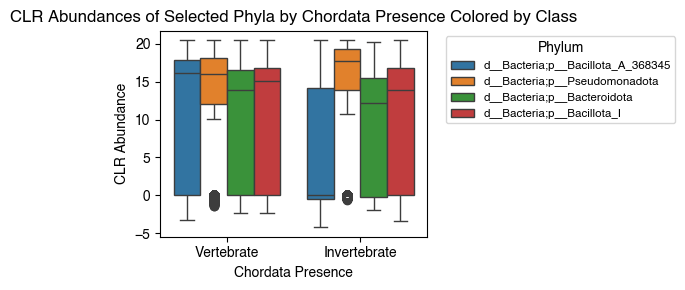

In [55]:
#now repeat the boxplot with clr transformed data
# Filter the merged clr data for the phyla of interest and and I also want to keep the classes in classes_of_interest like these 2 lines below
#classes_of_interest = ['Mammalia', 'Insecta', 'Actinopterygii', 'Aves', 'Reptilia', 'Amphibia', 'Gastropoda', 'Malacostraca', 'Bivalvia']
#filtered_classes = merged[merged['Class'].isin(classes_of_interest)][['Chordata', 'Class'] + phyla_of_interest]

filtered_clr = merged_clr[merged_clr['Class'].isin(classes_of_interest)][['Chordata', 'Class'] + phyla_of_interest]
# Melt the dataframe for easier plotting
melted_clr = filtered_clr.melt(id_vars=['Chordata', 'Class'], value_vars=phyla_of_interest, var_name='Phylum', value_name='CLR_Abundance')
# Plot the clr abundances as box plots with jitter points and make Chordata the x axis and make the phyla different colors
plt.figure(figsize=(6, 3))
sns.boxplot(data=melted_clr, x='Chordata', y='CLR_Abundance', hue='Phylum')
#sns.stripplot(data=melted_clr, x='Chordata', y='CLR_Abundance', hue='Class', palette='Set1', dodge=True,alpha=0.2)
plt.title('CLR Abundances of Selected Phyla by Chordata Presence Colored by Class')
plt.ylabel('CLR Abundance')
plt.xlabel('Chordata Presence')
#make font Helvetica
plt.rcParams["font.family"] = "Helvetica"
plt.legend(title='Phylum')
#make legend smaller and to the right
plt.legend(title='Phylum', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.savefig('CLR_Abundances_by_Chordata_colored_by_Class.pdf')
plt.show()







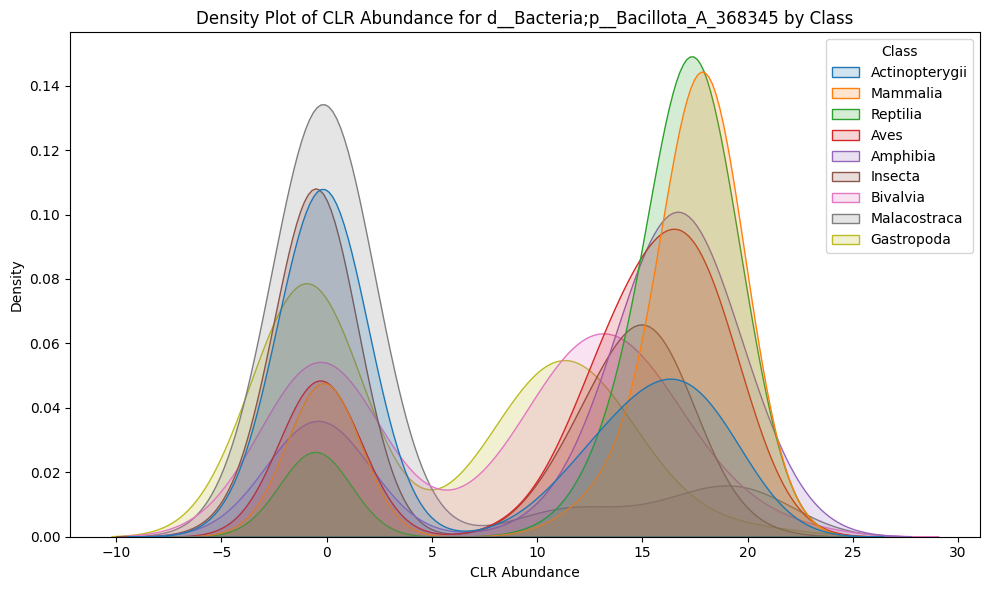

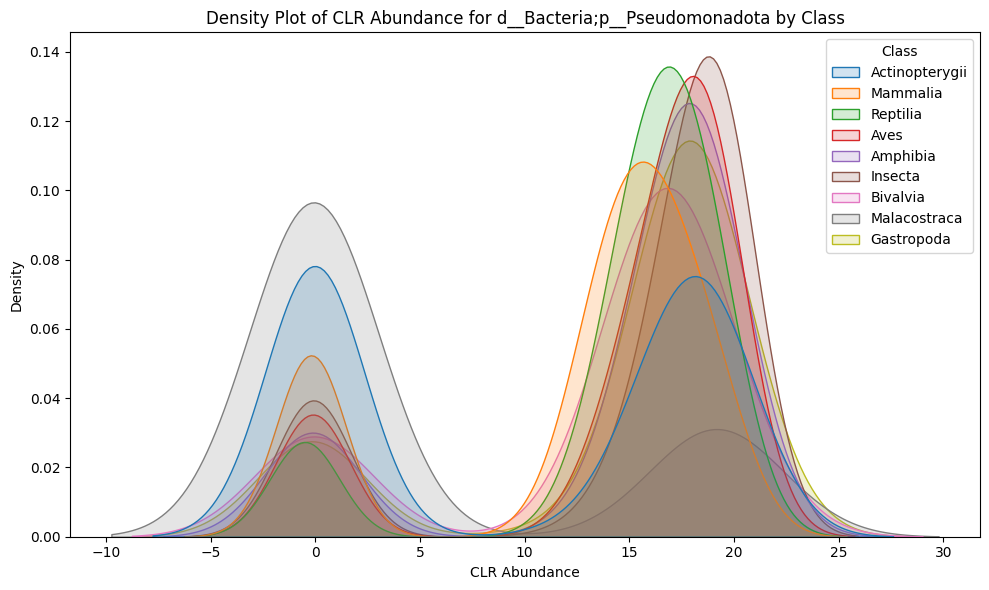

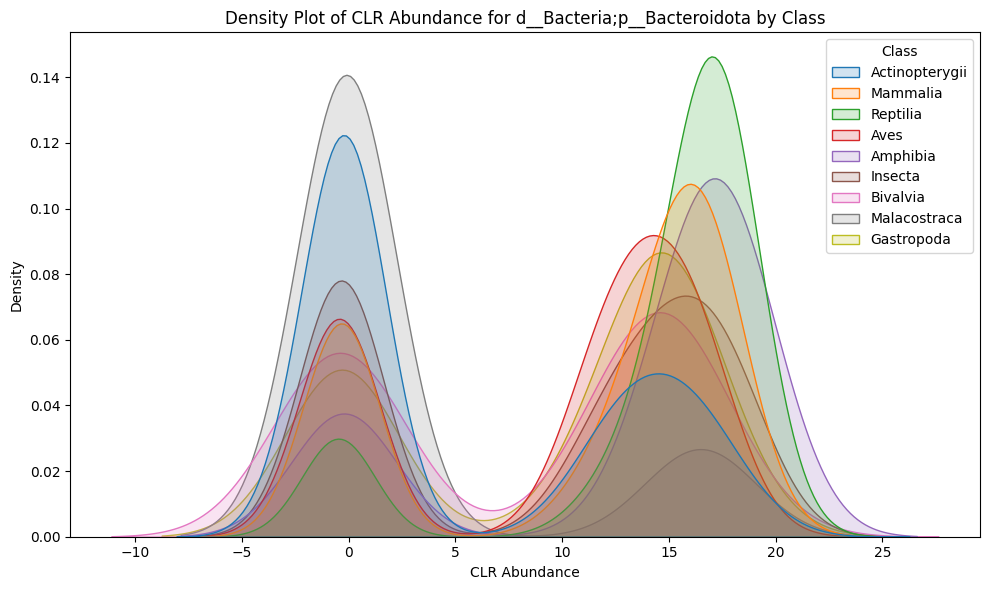

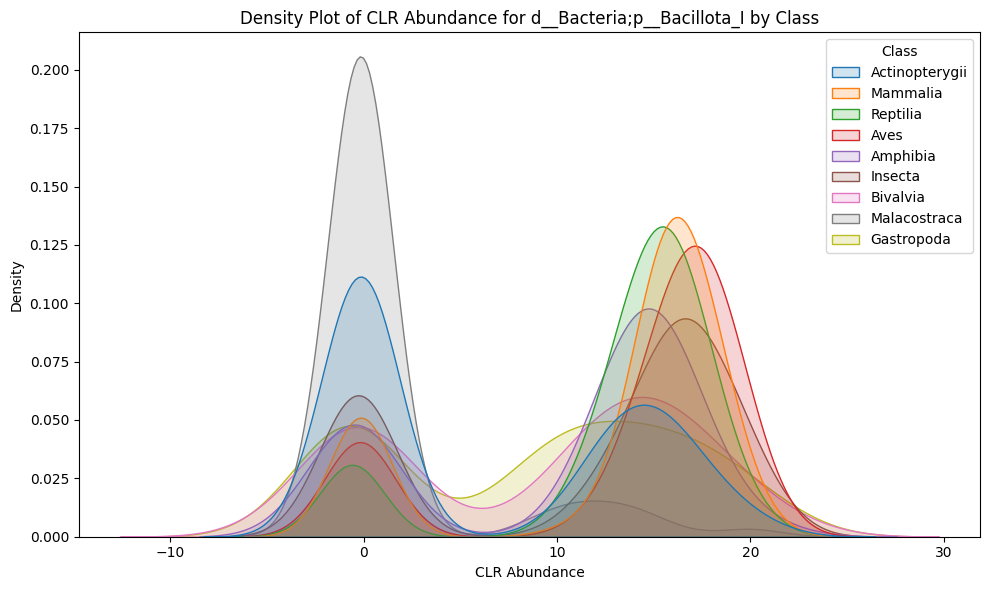

In [39]:
#ok now do the density plots for clr transformed data colored by Class
for phylum in phyla_of_interest:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=melted_clr[melted_clr['Phylum'] == phylum], x='CLR_Abundance', hue='Class', common_norm=False, fill=True, alpha=0.2)
    plt.title(f'Density Plot of CLR Abundance for {phylum} by Class')
    plt.xlabel('CLR Abundance')
    plt.ylabel('Density')
    plt.tight_layout()
    #plt.savefig(f'Density_Plot_CLR_{phylum}_by_Class.png')
    plt.show()



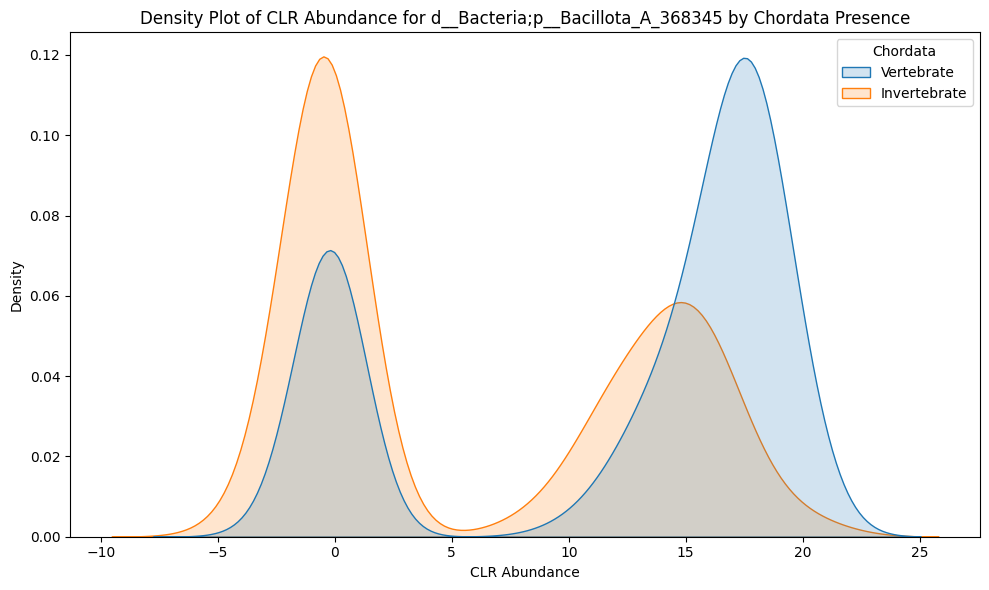

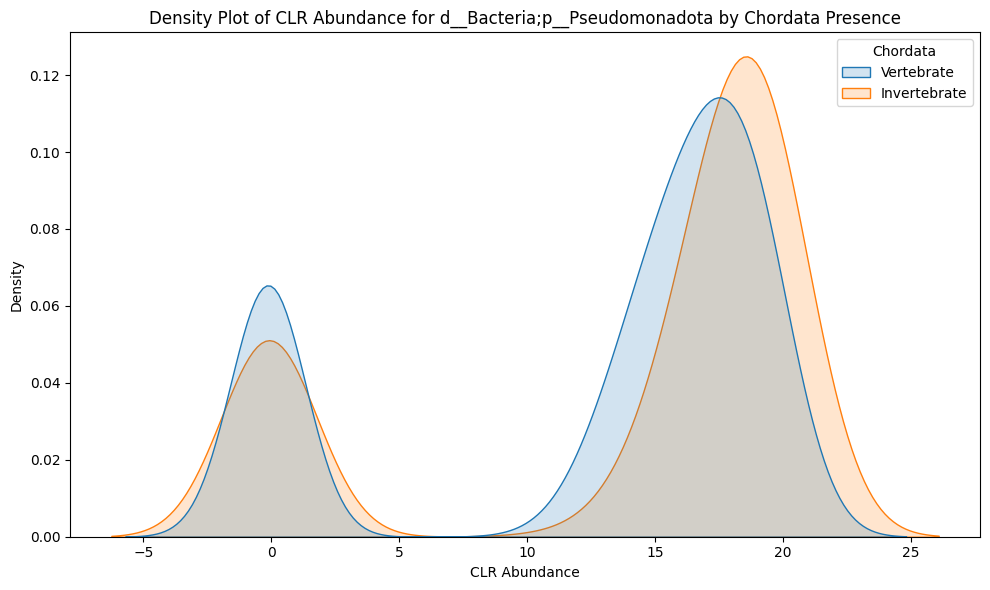

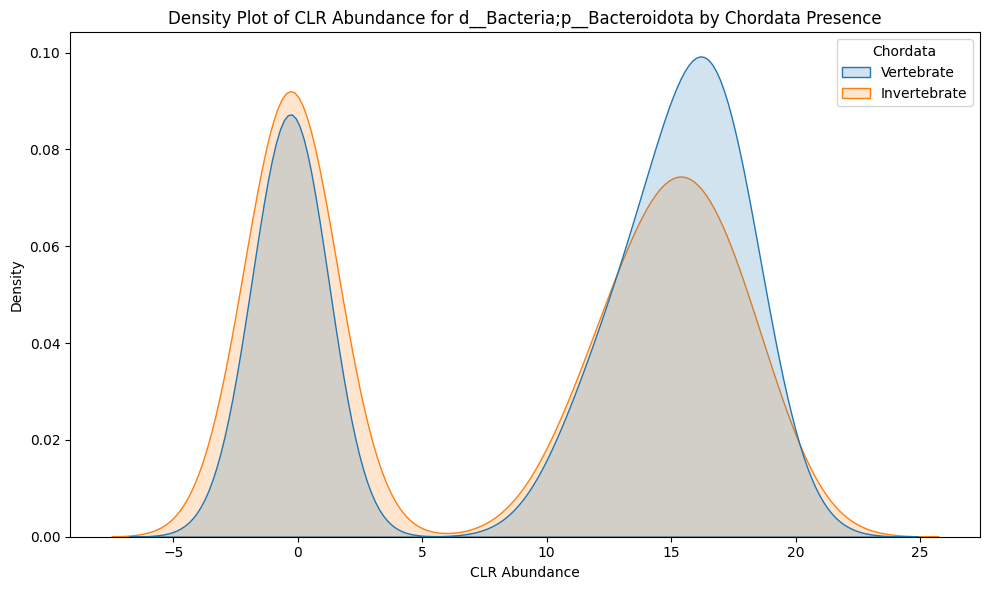

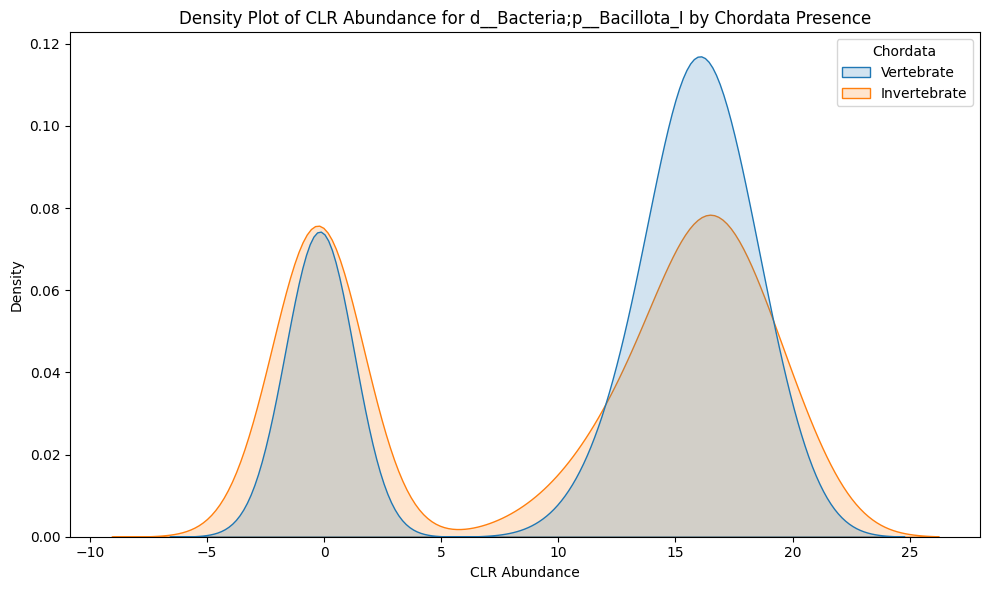

In [40]:
#for clr transformed data do density plots colored by Chordata
for phylum in phyla_of_interest:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=melted_clr[melted_clr['Phylum'] == phylum], x='CLR_Abundance', hue='Chordata', common_norm=False, fill=True, alpha=0.2)
    plt.title(f'Density Plot of CLR Abundance for {phylum} by Chordata Presence')
    plt.xlabel('CLR Abundance')
    plt.ylabel('Density')
    plt.tight_layout()
    #plt.savefig(f'Density_Plot_CLR_{phylum}_by_Chordata.png')
    plt.show()

In [54]:
#now perform krusk wallis test on the clr table for each phyla comparing Chordata. But I want all the Classes this time
from scipy.stats import kruskal
filtered_clr2= merged_clr[['Chordata', 'Class'] + phyla_of_interest]
results = {}
for phylum in phyla_of_interest:
    group1 = filtered_clr2[filtered_clr2['Chordata'] == 'Vertebrate'][phylum]
    group2 = filtered_clr2[filtered_clr2['Chordata'] == 'Invertebrate'][phylum]
    stat, p = kruskal(group1, group2)
    results[phylum] = (stat, p)
# Print the results
for phylum, (stat, p) in results.items():
    print(f'Kruskal-Wallis test for {phylum}: H-statistic={stat}, p-value={p}')
#ok done


Kruskal-Wallis test for d__Bacteria;p__Bacillota_A_368345: H-statistic=886.5178242416745, p-value=8.369667839714978e-195
Kruskal-Wallis test for d__Bacteria;p__Pseudomonadota: H-statistic=120.298666617315, p-value=5.441869100027356e-28
Kruskal-Wallis test for d__Bacteria;p__Bacteroidota: H-statistic=58.53788638365572, p-value=1.9941368798167348e-14
Kruskal-Wallis test for d__Bacteria;p__Bacillota_I: H-statistic=60.99773847353241, p-value=5.714041037724284e-15


In [49]:
melted_clr

,Chordata,Class,Phylum,CLR_Abundance
0,Vertebrate,Actinopterygii,d__Bacteria;p__Bacillota_A_368345,-2.531706
1,Vertebrate,Actinopterygii,d__Bacteria;p__Bacillota_A_368345,12.655917
2,Vertebrate,Actinopterygii,d__Bacteria;p__Bacillota_A_368345,14.430721
3,Vertebrate,Actinopterygii,d__Bacteria;p__Bacillota_A_368345,11.670962
4,Vertebrate,Actinopterygii,d__Bacteria;p__Bacillota_A_368345,-2.448962
...,...,...,...,...
20743,Vertebrate,Mammalia,d__Bacteria;p__Bacillota_I,16.418721
20744,Vertebrate,Mammalia,d__Bacteria;p__Bacillota_I,16.423919
20745,Vertebrate,Mammalia,d__Bacteria;p__Bacillota_I,16.069877
20746,Vertebrate,Mammalia,d__Bacteria;p__Bacillota_I,12.919629
